In [58]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage.morphology import  erosion, footprint_rectangle
from skimage.segmentation import flood


# Ejercicio de síntesis taller 5

## Ejercicio 1:

### Abra la imagen objects.png.

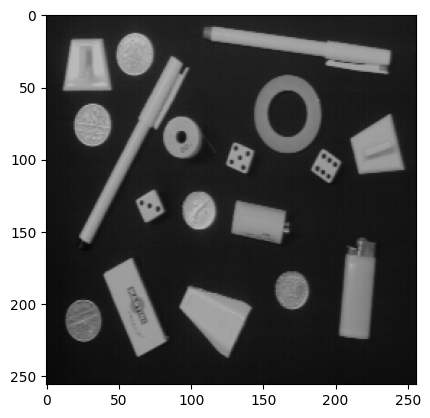

In [59]:
objects = cv2.imread('images/objects.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(objects, cmap='gray', vmin=0, vmax=255)
plt.show()

### Umbralice esta imagen para separar los objetos del fondo (umbral=70).

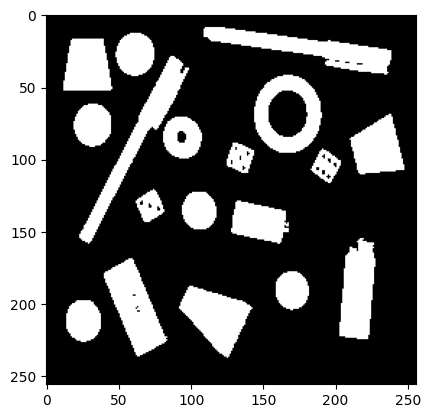

In [60]:
thres_value, thres_objects= cv2.threshold(objects, 70, 255, cv2.THRESH_BINARY)
plt.imshow(thres_objects, cmap='gray', vmin=0, vmax=255)
plt.show()

### Realice las operaciones necesarias (incluyendo operaciones morfológicas y de segmentación) sobre esta imagen binaria para conservar únicamente los objetos de espesor de por lo menos 15 píxeles.

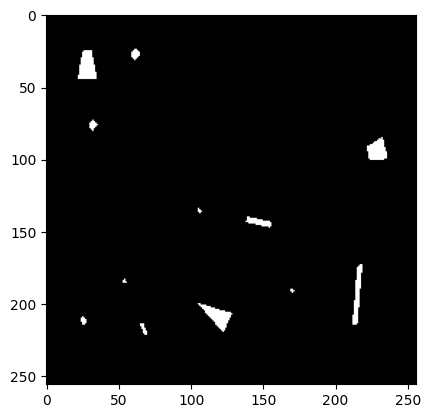

In [61]:
eroed = erosion(thres_objects, footprint=footprint_rectangle((17,17)))
plt.imshow(eroed, cmap='gray', vmin=0, vmax=255)
plt.show()

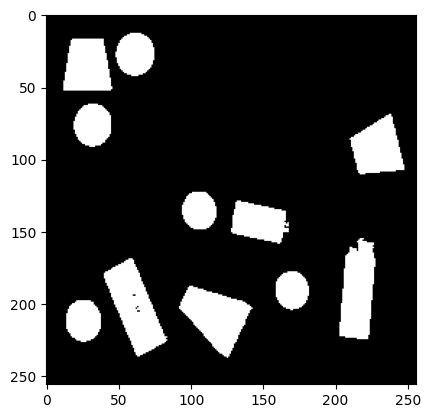

In [62]:
mascara = np.zeros((256,256), np.uint8)
for i in range(256):
    for j in range(256):
        if eroed[i][j] == 255 and mascara[i][j] == 0:
            mascara1 = flood(thres_objects, (i,j) , tolerance=10).astype(np.uint8) * 255
            mascara += mascara1
plt.imshow(mascara, cmap='gray', vmin=0, vmax=255)
plt.show()

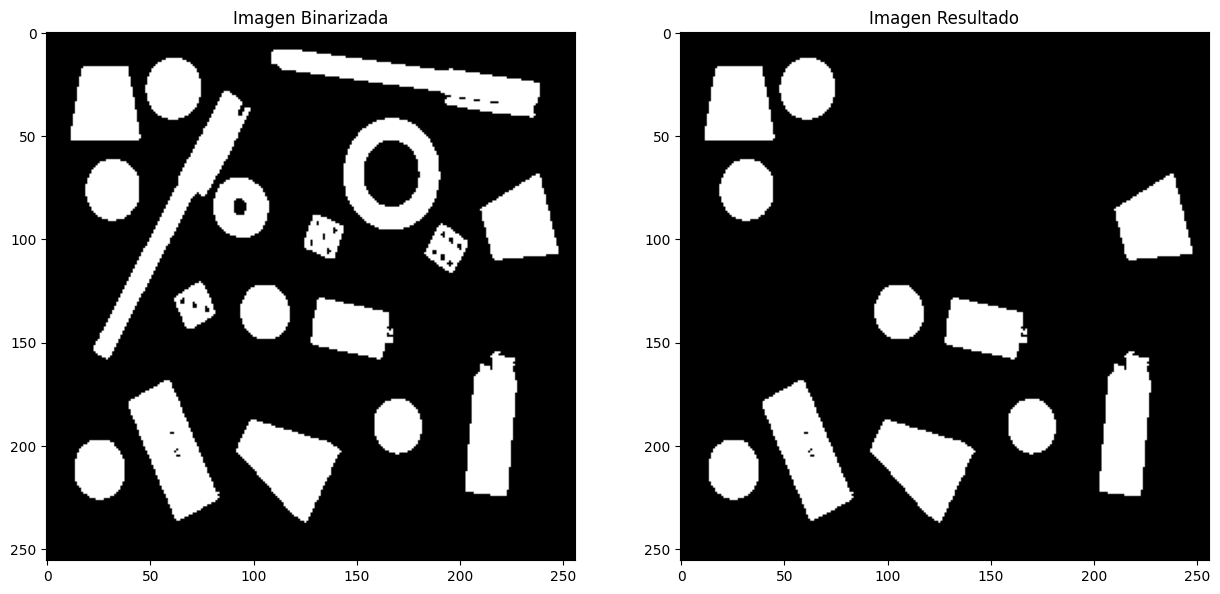

In [63]:
fig, axes = plt.subplots(1,2, figsize = (15,10))

axes[0].imshow(thres_objects, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Imagen Binarizada')
axes[1].imshow(mascara, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Imagen Resultado')


plt.show()